In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import dsn.lib.LowRank.Fig1_Spontaneous.fct_mf as mf

from dsn.util.tf_DMFT_solvers import rank2_CDD_static_solve

DTYPE = tf.float64

n = 10

_kappa1_init = -5.0*np.ones((n,))
_kappa2_init = -5.0*np.ones((n,))
_delta_0_init = 5.0*np.ones((n,))

_g = 0.8*np.ones((n,))
_rhom = 3.0*np.ones((n,)) 
_rhon = np.linspace(0.2, 2.0, 10)
_betam = 0.6*np.ones((n,))
_betan = 1.0*np.ones((n,))

kappa1_init = tf.placeholder(dtype=DTYPE, shape=(n,))
kappa2_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_0_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_inf_init = tf.placeholder(dtype=DTYPE, shape=(n,))

g = tf.placeholder(dtype=DTYPE, shape=(n,))
rhom = tf.placeholder(dtype=DTYPE, shape=(n,))
rhon = tf.placeholder(dtype=DTYPE, shape=(n,))
betam = tf.placeholder(dtype=DTYPE, shape=(n,))
betan = tf.placeholder(dtype=DTYPE, shape=(n,))

its_list = [200]
eps  = 0.2

num_its = len(its_list)

all_kappa1s = []
all_kappa2s = []
all_delta_0s = []
all_delta_infs = []

c_bar = 1.0
gamma_HI = 0.08
gamma_LOW = -0.14
gammaAs = [gamma_HI, gamma_HI, gamma_LOW, gamma_LOW]
gammaBs = [gamma_LOW, gamma_LOW, gamma_HI, gamma_HI]
cAs = [c_bar, 0.0, c_bar, 0.0]
cBs = [0.0, c_bar, 0.0, c_bar]
num_conds = len(cAs)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:

for i in range(num_its):
    print(i)
    its = its_list[i]
    kappa1s_i = np.zeros((num_conds, n, its+1))
    kappa2s_i = np.zeros((num_conds, n, its+1))
    delta_0s_i = np.zeros((num_conds, n, its+1))
    for j in range(num_conds):
        print('j', j)
        cA = cAs[j]
        cB = cBs[j]
        gammaA = gammaAs[j]
        gammaB = gammaBs[j]
        
        kappa1, kappa2, delta_0, z, xs = rank2_CDD_static_solve(kappa1_init, kappa2_init, delta_0_init, \
                                                         cA, cB, gammaA, gammaB, \
                                                         g, rhom, rhon, betam, betan,
                                                         its, eps, gauss_quad_pts=50, db=True)

        feed_dict = {kappa1_init:_kappa1_init, kappa2_init:_kappa2_init, delta_0_init:_delta_0_init, \
                     g:_g, rhom:_rhom, rhon:_rhon, betam:_betam, betan:_betan}
        
        with tf.Session() as sess:
            _kappa1, _kappa2, _delta_0, _xs = sess.run([kappa1, kappa2, delta_0, xs], feed_dict)
            
        kappa1s_i[j,:,:] = _xs[:,0,:]
        kappa2s_i[j,:,:] = _xs[:,1,:]
        delta_0s_i[j,:,:] = _xs[:,2,:]
        
    all_kappa1s.append(kappa1s_i)
    all_kappa2s.append(kappa2s_i)
    all_delta_0s.append(delta_0s_i)


0
j 0
j 1
j 2
j 3


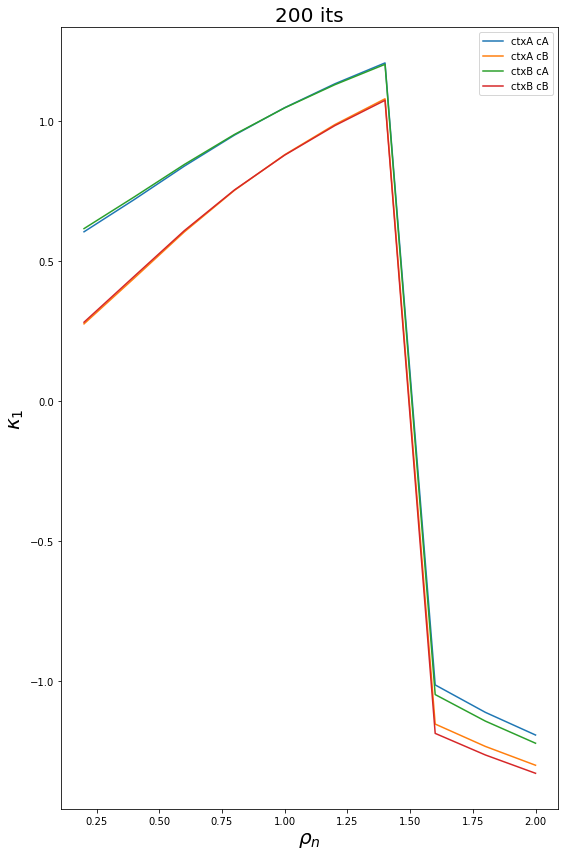

In [11]:
labels = ['ctxA cA', 'ctxA cB', 'ctxB cA', 'ctxB cB']

fontsize = 20
plt.figure(figsize=(8, 12))
for j in range(num_its):
    plt.subplot(num_its, 1, j+1)
    #plt.plot(_SnI, mu_true, 'k--', lw=4)
    for i in range(num_conds):
        plt.plot(_rhon, all_kappa1s[j][i,:,-1])
        plt.ylabel(r'$\kappa_1$', fontsize=fontsize)
    plt.title('%d its' % its_list[j], fontsize=fontsize)
    plt.legend(labels)
plt.xlabel(r'$\rho_n$', fontsize=fontsize)
plt.tight_layout()
plt.show()

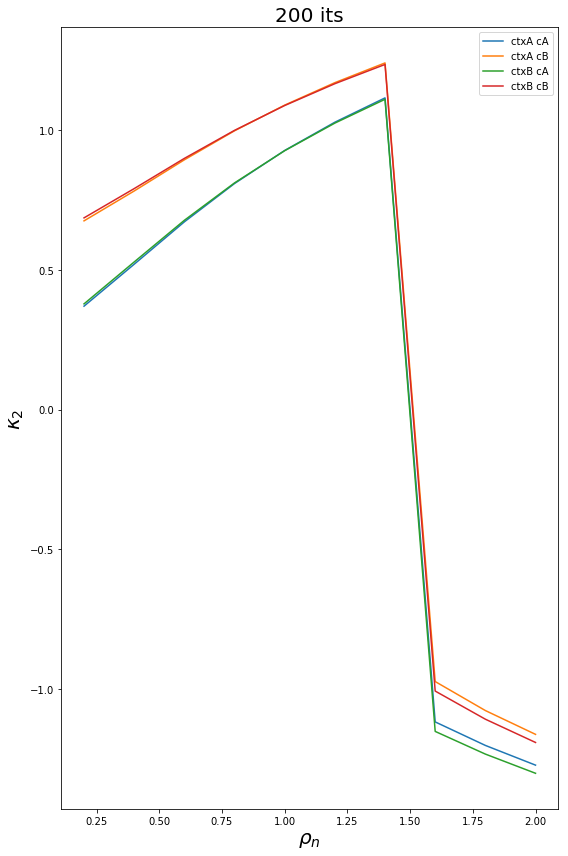

In [12]:
fontsize = 20
plt.figure(figsize=(8, 12))
for j in range(num_its):
    plt.subplot(num_its, 1, j+1)
    for i in range(num_conds):
        plt.plot(_rhon, all_kappa2s[j][i,:,-1],)
        plt.ylabel(r'$\kappa_2$', fontsize=fontsize)
    plt.title('%d its' % its_list[j], fontsize=fontsize)
    plt.legend(labels)
plt.xlabel(r'$\rho_n$', fontsize=fontsize)
plt.tight_layout()
plt.show()

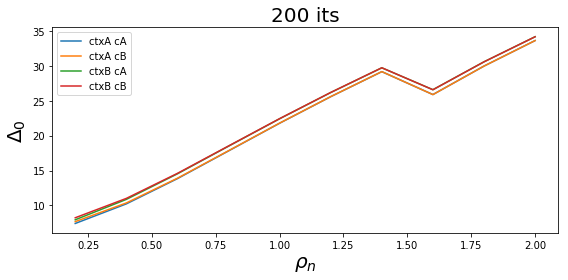

In [13]:
fontsize = 20
plt.figure(figsize=(8, 4*num_its))
for j in range(num_its):
    plt.subplot(num_its, 1, j+1)
    for i in range(num_conds):
        plt.plot(_rhon, all_delta_0s[j][i,:,-1])
        plt.ylabel(r'$\Delta_0$', fontsize=fontsize)
    plt.title('%d its' % its_list[j], fontsize=fontsize)
    plt.legend(labels)
plt.xlabel(r'$\rho_n$', fontsize=fontsize)
plt.tight_layout()
plt.show()

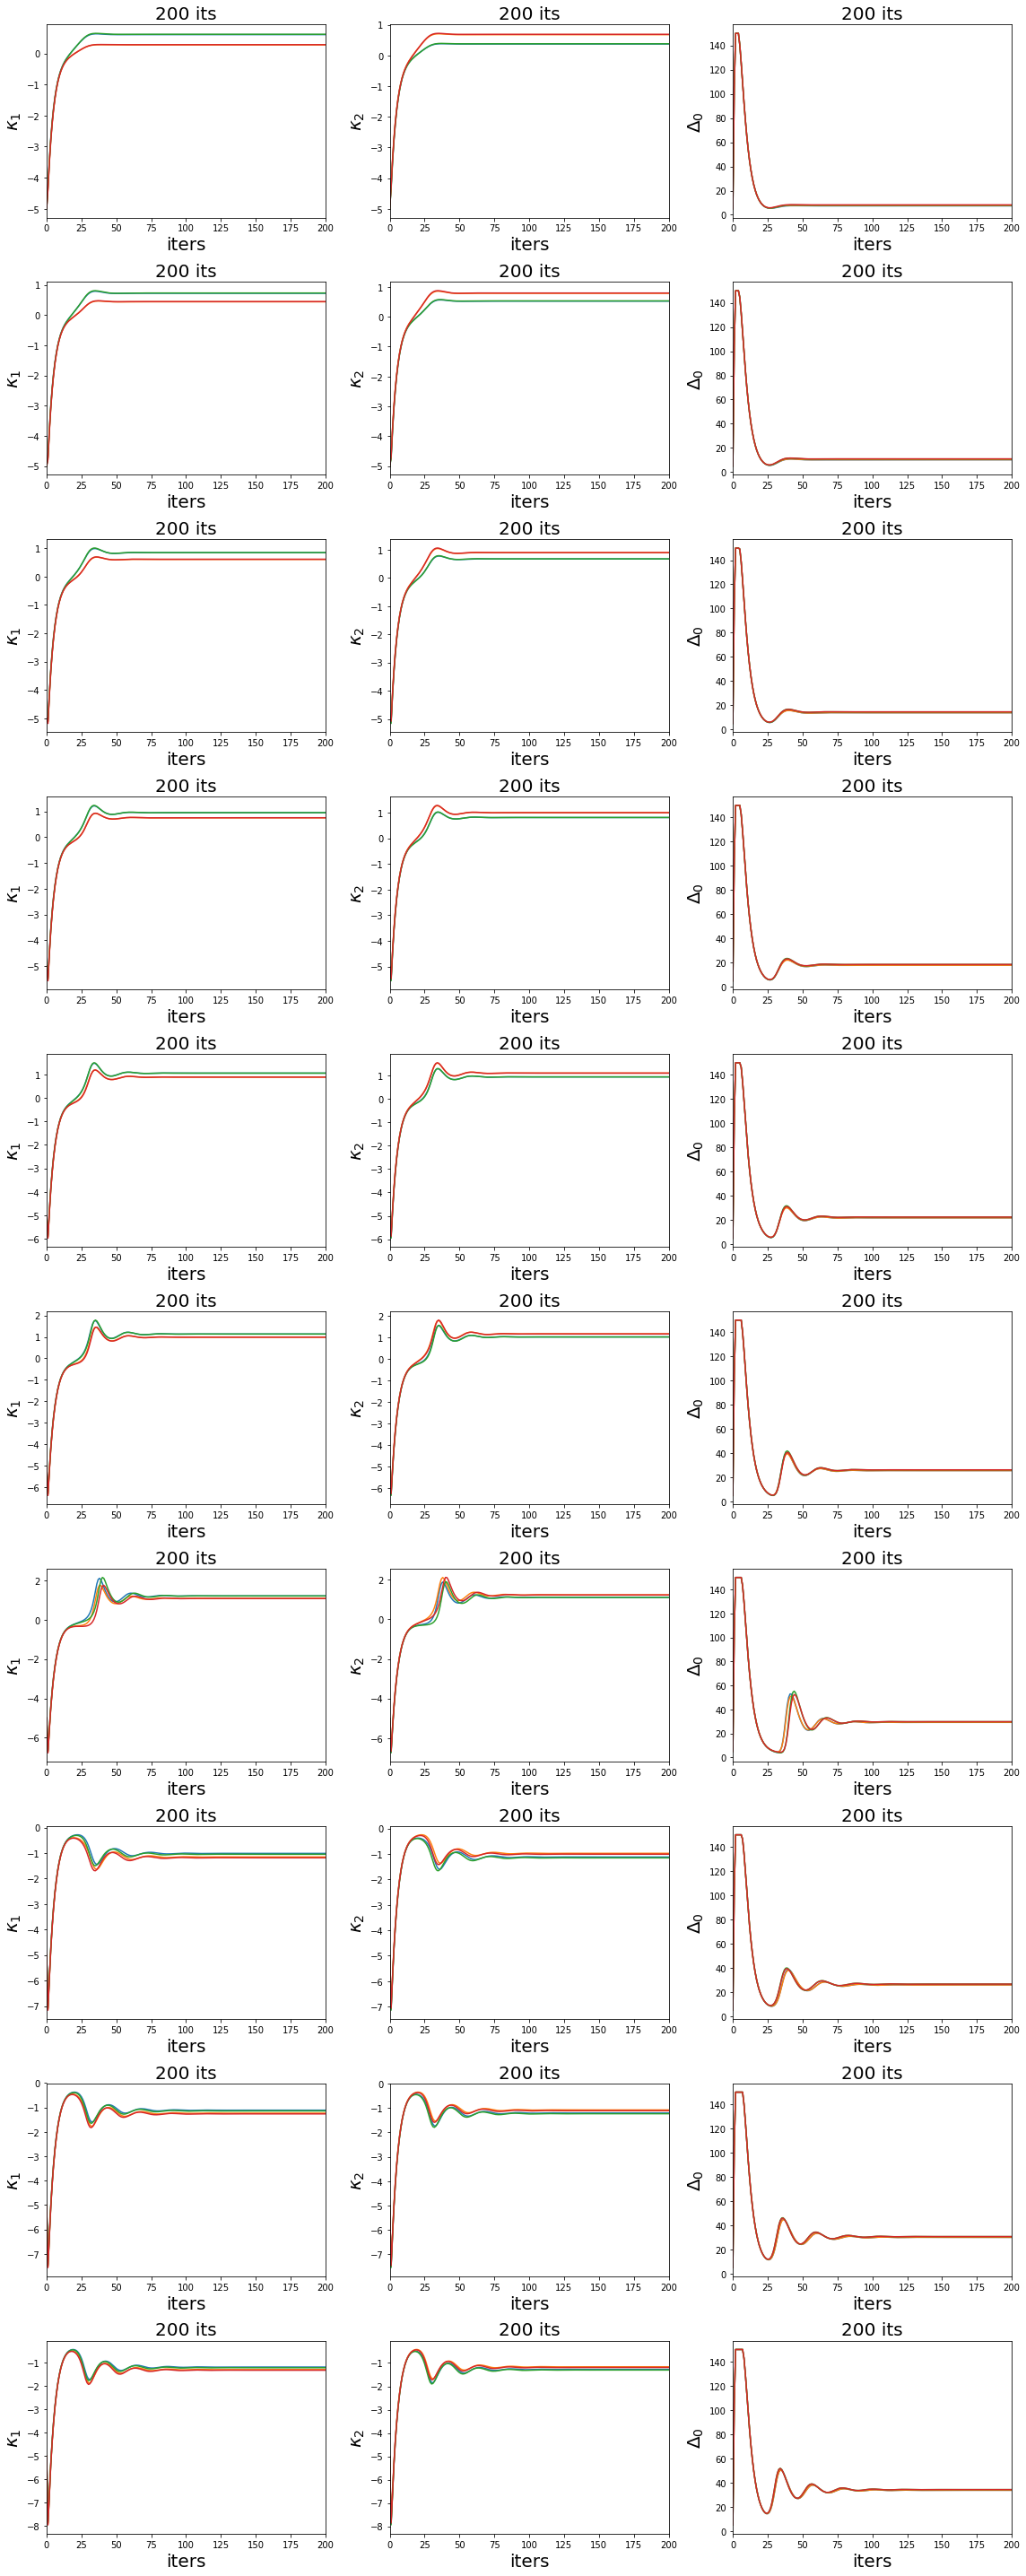

In [14]:
fontsize = 20
fig, axs = plt.subplots(n, 3, figsize=(16, 4*n))

j=0
max_its = its_list[j]
its = its_list[j]
for g_ind in range(n):
    
    ax = axs[g_ind][0]
    for i in range(num_conds):
        ax.plot(np.arange(its+1), all_kappa1s[j][i,g_ind,:])
        ax.set_ylabel(r'$\kappa_1$', fontsize=fontsize)
    ax.set_title('%d its' % its_list[j], fontsize=fontsize)
    #ax.legend()
    ax.set_xlim([0, max_its])
    ax.set_xlabel('iters', fontsize=fontsize)
    
    ax = axs[g_ind][1]
    for i in range(num_conds):
        ax.plot(np.arange(its+1), all_kappa2s[j][i,g_ind,:])
        ax.set_ylabel(r'$\kappa_2$', fontsize=fontsize)
    ax.set_title('%d its' % its_list[j], fontsize=fontsize)
    #ax.legend()
    ax.set_xlim([0, max_its])
    ax.set_xlabel('iters', fontsize=fontsize)
    
    ax = axs[g_ind][2]
    for i in range(num_conds):
        ax.plot(np.arange(its+1), all_delta_0s[j][i,g_ind,:])
        ax.set_ylabel(r'$\Delta_{0}$', fontsize=fontsize)
    ax.set_title('%d its' % its_list[j], fontsize=fontsize)
    #ax.legend()
    ax.set_xlabel('iters', fontsize=fontsize)
    ax.set_xlim([0, max_its])
    
plt.tight_layout()
plt.show()